In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, optimizers, Sequential, datasets
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Dropout,Flatten,Dense
import os
import numpy as np
import matplotlib.pyplot as plt

### Downloading cifar-10 dataset

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170500096/170498071 [==============================] - 3545s 21us/step


## Data Preprocessing

In [6]:
# converting category data into onehot
num_classes = 10
y_train_onehot = keras.utils.to_categorical(y_train, num_classes)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes)
y_train_onehot[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Show the first 9 images


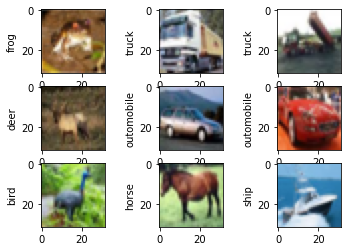

In [9]:
#Create a image tag list

category_dict = {0:'airplane', 1:'outomobile', 2:'bird', 3:'cat', 4:'deer',
                5:'dog', 6:'frog',7:'horse',8:'ship', 9:'truck'}

#Show the first 9 images and their labels
plt.figure()

for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.ylabel(category_dict[y_train[i][0]])
    
plt.show()    
    

In [10]:
#Pixel normalization
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## Model Creation

In [18]:
def CNN_classification_model(input_size = x_train.shape[1:]):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same',
                     input_shape=input_size))
    #relu activation function
    model.add(Activation('relu'))
    
    #Conv2
    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    
    #maxpooling
    model.add(MaxPooling2D(pool_size=(2, 2),strides =1))
    
    #the second block
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    
    #maxpooling.the default strides =1
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #Before sending a feature map into a fully connected network, it should be flattened into a column vector.
    model.add(Flatten())
    
    #fully connected layer
    model.add(Dense(128))
    model.add(Activation('relu'))
    
    #dropout layer.every neuronis set to 0 with a probability of 0.25
    model.add(Dropout(0.25))
    model.add(Dense(num_classes))
    
    #map the score of each class into probability
    model.add(Activation('softmax'))
    opt = keras.optimizers.Adam(lr=0.0001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

## Model Training

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_name = "final_cifar10.h5"
model_checkpoint = ModelCheckpoint(model_name, monitor='loss',verbose=1, save_best_only=True)
#load pretrained models
trained_weights_path = 'cifar10_weights.h5'
if os.path.exists(trained_weights_path):
    model.load_weights(trained_weights_path, by_name =True)
    #train
    model.fit(x_train,y_train, batch_size=32, epochs=10,callbacks = [model_checkpoint],verbose=1)

In [24]:
new_model = CNN_classification_model()
new_model.load_weights('final_cifar10.h5')
model.evaluate(x_test, y_test, verbose=1)

OSError: Unable to open file (unable to open file: name = 'final_cifar10.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)